<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on SageMaker, Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
char_to_int = dict((c, i) for i, c in enumerate(word_index)) #enumerate returns index & value. Convert it to dictionary

In [0]:
test = char_to_int["and"]

In [10]:
test

30014

In [0]:
import numpy as np

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8982,), (8982,), (2246,), (2246,))

In [11]:
number_words = len(word_index) # the number of unique characters

print("number words:", number_words)

number words: 30979


In [13]:
#reshapes y variables
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

y_train.shape, y_test.shape

((8982, 1), (2246, 1))

In [12]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


#print('Build model...')
# TODO - your code!



8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)


In [14]:
#create sequential model
model_1 = Sequential()

model_1.add(Embedding(max_features+1, 256)) #using +1 because of error when value = max value

model_1.add(LSTM(256, dropout=0.2))

model_1.add(Dense(46, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
# You should only run this cell once your model has been properly configured

model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model_1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model_1.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 4s 2ms/sample - loss: 1.5658 - acc: 0.5917
Test score: 1.565806358654586
Test accuracy: 0.5917186


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*
pad_sequences is used to ensure that all sequences in a list have the same length. Pad_sequences changes the length of every sequence to be the same(maxlen) by adding the same value to the start to each sequence to increase it up to the max length. For example if it is over the max length, it is shortened to be at the max length. This is important because the sequences are the input to the neural network, therefore they've to be the same.
Please add your answer in markdown here.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*
LSTM networks have an advantage over RNNs because of the maths involved in the LSTM. The maths involved in the LSTM calculations avoids the issue of diminissing gradient. After a certain number of epochs RNNs the gradient values in an RNN for events in the far past will be so small that a computer can interpret it as 0. The LSTM is a great tool for anything that has a sequence. RNN addresses an issue by including a feedback look which serves as some sort of memory.
Please add your answer in markdown here.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*
1: Weather/climate prediction: We can use past weather patterns & reoccuring or current atomspheric conditions to predict weather patterns
2. Financial predictions/stock broker: they can attempt to predict price/sale changes based on previous pattern of price/sale changes
3. Speech or text prediction: we can find patterns in a series of words to predict next word or generate future text that follows a certain or similar pattern
Please add your answer in markdown here.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [19]:
!pip install google_images_download

     |████████████████████████████████| 911kB 45.9MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=f8150e00ac52ad4874b9b96986b9f563319cd17e90415693c2900e24f4d7440c
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [20]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...


Unfortunately all 5 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [0]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
      if entry[1] == 'bullfrog' or entry[1] == 'tree frog' or entry[1] == 'tailed frog':
        return entry[2]
            
    return 0.0

In [0]:
for path in absolute_image_paths[0]['lilly frog pond']:
  img_contains_frog(process_img_path(path))

#### Stretch Goal: Displaying Predictions

In [0]:
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import requests
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))
def img_contains_fish(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if 'fish' in entry[1]:
      return entry[2]
  return 0.0

In [0]:
for path in absolute_image_paths[0]['lilly frog pond'][:5]:
  img_contains_fish(process_img_path(path))

IndexError: ignored

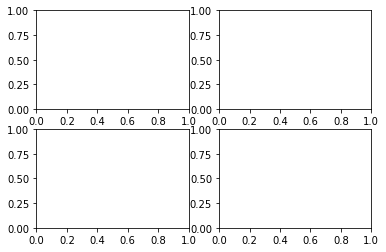

In [37]:
f, axarr = plt.subplots(2,2)
imgs, frogs = display_predictions(absolute_image_paths[0]['lilly frog pond'])
for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
Generally autoencoders can be good at removing noises from imput images, it can be viewed as being useful for removing noise from pictures such as astronomical imaging. Also An Autoencoder is an algorithm that applies backpropagation, setting the target values to be equal to the inputs. It is used to reduce the size of our inputs into a smaller representation. They are also used for Dimentionality Reduction, Image Compression. Autoencoders can also be used to recolor images

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

I believe my strongest area for now as a Data Scientist is communication. My communication skills are above average because I've been told that I'm able to explain technical things to non-technical people. I believe this is a good skill for us because we would need to explain analyses of data to non-technical people in a non-technical but detailed manner. Also I really do enjoy cleaning and analysing data.

- What area of Data Science would you most like to learn more about, and why?

I'd definitely like to learn more about dealing with "big data", particularly when the data is unstructured. In the real world, data is often messy but valuable. I believe I need to sharpen my skills in this area. Also I'd like to master the act of finding which libraries are needed to import and format the data, use the documentation to learn the libraries enough to do what is needed.

- Where do you think Data Science will be in 5 years?
Genuinely I look at Data Science as the future. I believe we are at a point where data would be equivalent to currency. I see data science growing in fields like automobile, sports(my field), entertainment. I also see data science in the next 5years as an important study in helping with Climate change & global warmings.

- What are the threats posed by AI to our society?

Job displacement is the most immediate treat. If we don't accidentally create harmful AGI and manage to create it in a manner that allows it to augment human intelligence, society will fundamentally change on a massive and drastic scale. I believe there would come a time where we won't work for currency anymore because AGI would take more than half control of the work force. 
Also another threat posed by AI to our society is weaponized AI errors. I still believe humans are the greatest threat to humans. 
- How do you think we can counteract those threats? 

To avoid job loss, we could regulate AI. Although some may argue that would put us behind countried which don't regulate AI. I think it should be a world regulation where all countries are involved. I personally believe that once AI starts taking over the jobs, then we would turn our attention to some other kind of hobbies. And that would be a time where we don't have to work for currency. 

- Do you think achieving General Artifical Intelligence is ever possible?

Yes, but probably not before 2050. There's not a strong commercial incentive behind AGI research right now and consciousnesss seems to become more mystifying the more we learn about it.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")